In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import warnings
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.shape

(31962, 3)

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


* id - Unique ID for each tweet.
* label - 0 -> Tweet doesn't promote hatred ; 1 -> Tweet has hate speech
* tweet - The tweet made by user.

In [5]:
# Checking for null values in each column

df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Data preprocessing

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# Function for removing special characters from tweet

def remove_sp(text, symbol):
    
    # Finding all the specified special character in text
    s = re.findall(symbol, text)
    
    for i in s:
        
        # Substituting special character in text with blank space
        text = re.sub(i, '', text)
        
    return text

In [9]:
# Removing username from the tweet which starts with '@'

df['clean_tweet'] = np.vectorize(remove_sp)(df['tweet'], '@[\w]*') # '@[\w]*' -> Words starting with @

In [10]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


* Usernames are removed from the tweets.

In [11]:
# Removing numbers, punctuation marks and special characters from the tweet

df['clean_tweet'] = df['clean_tweet'].str.replace('[^a-zA-Z#]', ' ')

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
port_stem = PorterStemmer()

In [14]:
# Tokenizing the tweets

token = df['clean_tweet'].apply(lambda x: x.split())

In [15]:
token

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can, t, use, c...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [#sikh, #temple, vandalised, in, in, #calgary,...
31961                       [thank, you, for, you, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [16]:
# Stemming each token and removing stopwords

token = token.apply(lambda x: [port_stem.stem(i) for i in x if not i in stopwords.words('english')])

In [17]:
token

0        [father, dysfunct, selfish, drag, kid, dysfunc...
1        [thank, #lyft, credit, use, caus, offer, wheel...
2                                        [bihday, majesti]
3                     [#model, love, u, take, u, time, ur]
4                             [factsguid, societi, #motiv]
                               ...                        
31957                                    [ate, isz, youuu]
31958    [see, nina, turner, airwav, tri, wrap, mantl, ...
31959    [listen, sad, song, monday, morn, otw, work, sad]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [18]:
# Combining the tokens

for i in range(len(token)):
    token[i] = ' '.join(token[i])
    
df['clean_tweet'] = token

In [19]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [20]:
# Removing all the words with length less than 3 characters

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3]))

In [21]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair #disa...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [32]:
#! pip install wordcloud

In [33]:
from wordcloud import WordCloud

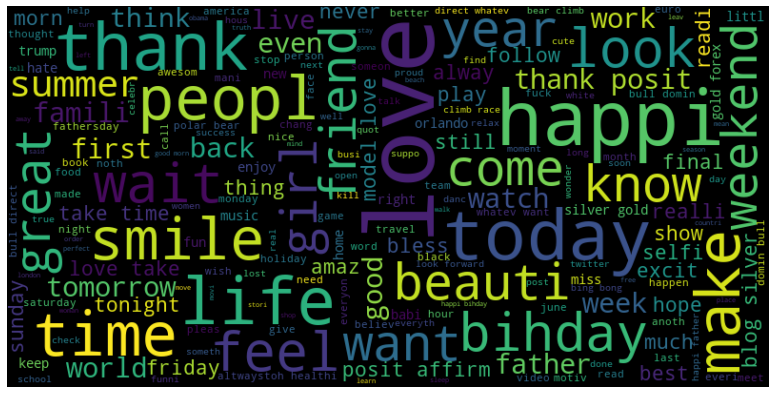

In [36]:
# Visualizing frequent words

# Joining all the tweets together so that it appears on a single line
words = ' '.join([i for i in df['clean_tweet']])
wc = WordCloud(width = 800, height = 400, random_state = 2, max_font_size = 100).generate(words)

plt.figure(figsize = (15, 7))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

* The more frequent the word, the larger its size in wordcloud.
* Most of the frequent words are positive.

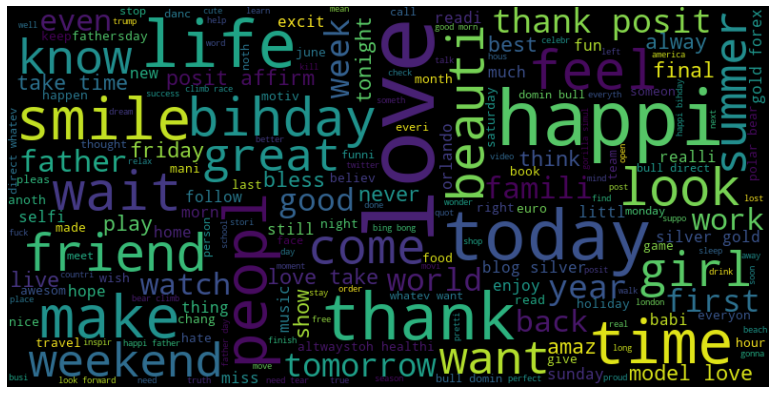

In [37]:
# Visualizing frequent positive words

words = ' '.join([i for i in df['clean_tweet'][df['label'] == 0]])
wc = WordCloud(width = 800, height = 400, random_state = 2, max_font_size = 100).generate(words)

plt.figure(figsize = (15, 7))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

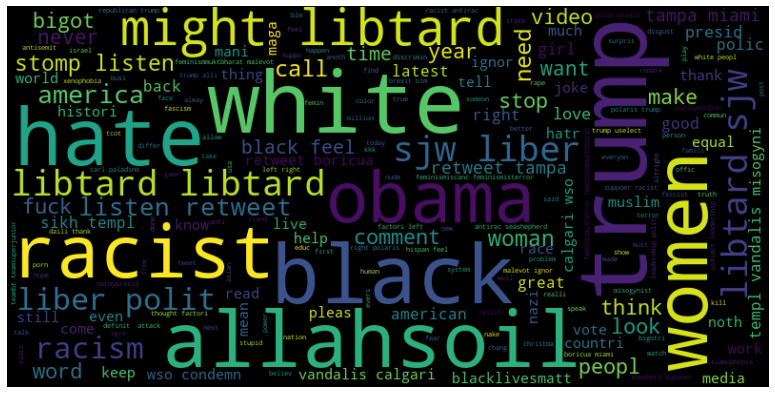

In [38]:
# Visualizing frequent negative words

words = ' '.join([i for i in df['clean_tweet'][df['label'] == 1]])
wc = WordCloud(height = 400, width = 800, random_state = 2, max_font_size = 100).generate(words)

plt.figure(figsize = (15, 7))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [42]:
# Function for extracting hashtags

def hashtag(x):
    tags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        tags.append(ht)
    return tags

In [45]:
# Extracting positive hashtags

pos_tags = hashtag(df['clean_tweet'][df['label'] == 0])
pos_tags[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [46]:
# Extracting negative hashtags

neg_tags = hashtag(df['clean_tweet'][df['label'] == 1])
neg_tags[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [47]:
# Combinning all the hashtags in postive tweets together and negative tweets together (unnest list)

pos_tags = sum(pos_tags, [])
neg_tags = sum(neg_tags, [])

In [48]:
pos_tags[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [49]:
neg_tags[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [53]:
# Creating a new dataframe with frequent positive hashtags

frequency = nltk.FreqDist(pos_tags)
new_df_pos = pd.DataFrame({'Hashtags':list(frequency.keys()), 'Count':list(frequency.values())})
new_df_pos.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


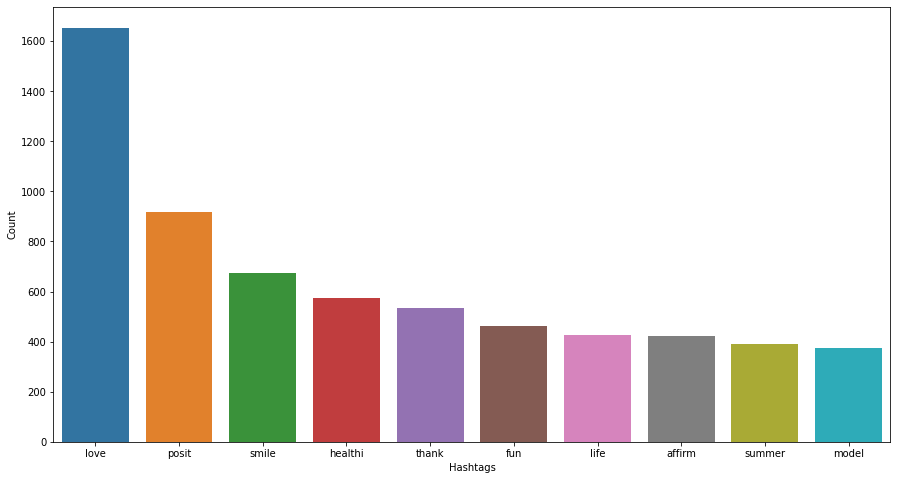

In [54]:
# Selecting top 10 positive hashtags

new_df_pos = new_df_pos.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 8))
sns.barplot(data = new_df_pos, x = 'Hashtags', y = 'Count')
plt.show()

* Most frequent positive hashtag used is `love`.

In [56]:
# Creating a new dataframe with negative hashtags

frequency = nltk.FreqDist(neg_tags)
new_df_neg = pd.DataFrame({'Hashtags':list(frequency.keys()), 'Count':list(frequency.values())})
new_df_neg.head()

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


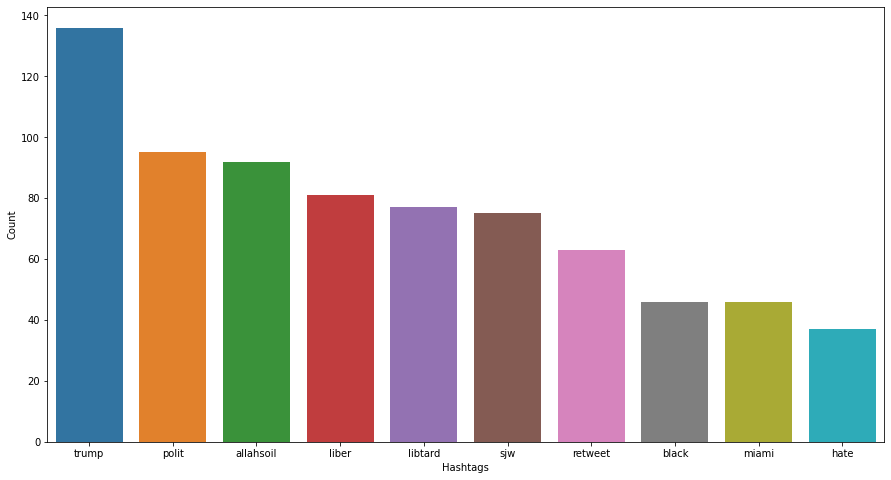

In [57]:
# Selecting top 10 negative hashtags

new_df_neg = new_df_neg.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 8))
sns.barplot(data = new_df_neg, x = 'Hashtags', y = 'Count')
plt.show()

* Most frequently used negative hashtag is `trump`.

# Feature extraction

* Feature extraction is used to reduce dimension of raw data that will be used to train the model in order to improve its accuracy.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# Creating bag of words

bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

* Bag of words creates a bag from a sentence which contains all the words used in that sentence.
* As machine cannot understand textual data, bag of word converts the text to numerical values by keeping a count of the occurence of the most frequent word present in each sentence or bag.

In [60]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124528 stored elements in Compressed Sparse Row format>

# Using the dataset in model

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Splitting the data for training and testing

x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], test_size = 0.25, random_state = 2)

In [63]:
from sklearn.metrics import accuracy_score, f1_score

In [64]:
# Function to train and get the accuracy of the model

def model_train(model, x, y):
    model.fit(x, y)
    pred = model.predict(x)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    print('Accuracy of the model:', acc)
    print('f1 score of the model:', f1)

## Using Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# Creating object for the model

log = LogisticRegression()

#### Evaluation

In [67]:
# For training data

model_train(log, x_train, y_train)

Accuracy of the model: 0.9530682908514455
f1 score of the model: 0.5439805431698419


In [68]:
# For testing data

model_train(log, x_test, y_test)

Accuracy of the model: 0.9548241771993493
f1 score of the model: 0.5826589595375723


* `Logistic Regression` is giving a good accuracy score of `95%`.

## Using SVM

In [69]:
from sklearn.svm import SVC

In [70]:
# Creating object for the model

support = SVC()

#### Evaluation

In [71]:
# For training data

model_train(support, x_train, y_train)

Accuracy of the model: 0.9627466522047474
f1 score of the model: 0.6449304174950298


In [72]:
# For testing data

model_train(support, x_test, y_test)

Accuracy of the model: 0.9603303716681266
f1 score of the model: 0.6343713956170703


* `Support Vector Machine` is giving a good accuracy of `96%`.

## Using Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Creating object for the model

dtc = DecisionTreeClassifier()

#### Evaluation

In [75]:
# For training data

model_train(dtc, x_train, y_train)

Accuracy of the model: 0.9927829460598223
f1 score of the model: 0.9457850203697901


In [76]:
# For testing data

model_train(dtc, x_test, y_test)

Accuracy of the model: 0.9946189463146039
f1 score of the model: 0.9619131975199291


* `Decision Tree Classifier` is giving a greater accuracy of `99.46%`.

## Using Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Creating object for the model

rfc = RandomForestClassifier()

#### Evaluation

In [84]:
# For training data

model_train(rfc, x_train, y_train)

Accuracy of the model: 0.9927412289850236
f1 score of the model: 0.9456589631480325


In [85]:
# For testing data

model_train(rfc, x_test, y_test)

Accuracy of the model: 0.9946189463146039
f1 score of the model: 0.9620476610767873


* `Random Forest Classifier` is also giving a greater accuracy of `99.46%`.

## Using K-Nearest Neighbour

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# Creating object for the model

knn = KNeighborsClassifier()

#### Evaluation

In [88]:
# For training data

model_train(knn, x_train, y_train)

Accuracy of the model: 0.9545701055441992
f1 score of the model: 0.5589307411907656


In [89]:
# For testing data

model_train(knn, x_test, y_test)

Accuracy of the model: 0.9468151670629458
f1 score of the model: 0.4772447724477245


* `K Nearest Neighbour` is giving an accuracy of `94%`.

#### Will be using Random Forest Classifier for prediction system as it gave more accuracy.

# Prediction system

In [105]:
# Providing input to the system
inp = x_test[8]

# Making prediction
pred = rfc.predict(inp)

# Printing the prediction
if (pred[0] == 1):
    print ('Tweet spreads hatred !')
else:
    print ('Tweet is positive.')

Tweet spreads hatred !
